<a href="https://colab.research.google.com/github/Faru03/pds-04-mu-_project_ID_11/blob/main/pds04_project_ID_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [4]:
data = pd.read_csv("covid_19_data.csv")
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [5]:
data.tail()

,Date,State,Region,Confirmed,Deaths,Recovered
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


In [6]:
data.count()

,0
Date,321
State,140
Region,321
Confirmed,321
Deaths,321
Recovered,321


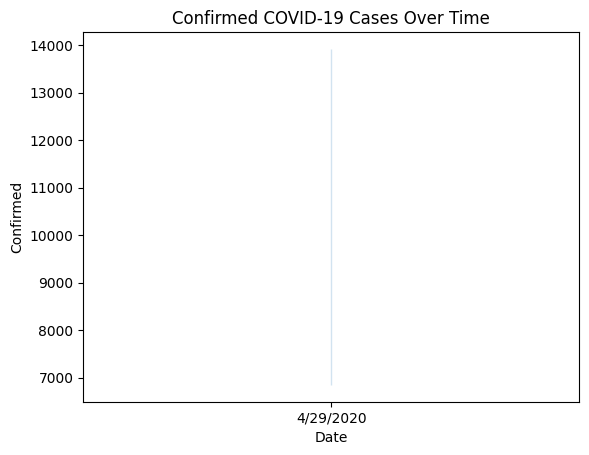

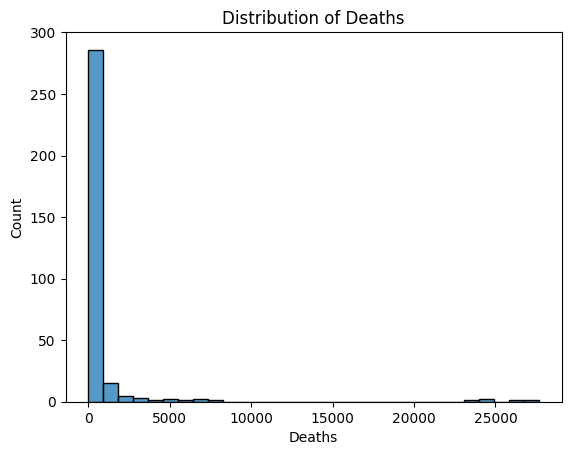

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(x='Date', y='Confirmed', data=data)
plt.title('Confirmed COVID-19 Cases Over Time')
plt.show()

sns.histplot(data['Deaths'], bins=30)
plt.title('Distribution of Deaths')
plt.show()


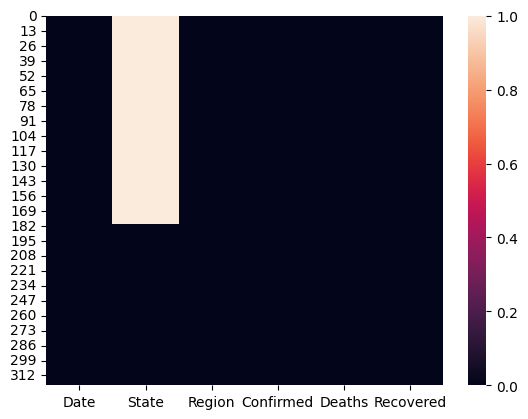

In [8]:
sns.heatmap(data.isnull())
plt.show()

In [9]:
data.isnull().sum()

,0
Date,0
State,181
Region,0
Confirmed,0
Deaths,0
Recovered,0


In [10]:
data.fillna(method='ffill', inplace=True)

<ipython-input-10-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [11]:
data['Region'].nunique()

187

In [12]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending = False)


,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166543
UK,166441
...,...
Sao Tome and Principe,8
Papua New Guinea,8
Bhutan,7


In [13]:
data.groupby('Region')['Deaths'].sum().sort_values(ascending = False)


,Deaths
Region,
US,60967
Italy,27682
UK,26166
Spain,24275
France,24121
...,...
Holy See,0
Grenada,0
South Sudan,0


In [14]:
data.groupby('Region')['Recovered'].sum().sort_values(ascending = False)


,Recovered
Region,
Spain,132929
US,120720
Germany,120400
Mainland China,77610
Iran,73791
...,...
Cabo Verde,2
Yemen,1
South Sudan,0


In [15]:
data[data.Confirmed < 10].head()


,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4


In [16]:
data = data[~(data['Confirmed'] < 10)]


In [17]:
data.Confirmed.value_counts().sort_values(ascending = False)


,count
Confirmed,
11,5
18,4
16,4
10,3
13,3
...,...
6520,1
545,1
185,1


In [18]:
data.groupby('Region').Confirmed.sum().sort_values(ascending=False).head()


,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166536
UK,166432


In [19]:
data.groupby('Region').Deaths.sum().sort_values(ascending=True).head(30)


,Deaths
Region,
Cambodia,0
Seychelles,0
Saint Lucia,0
Central African Republic,0
Saint Kitts and Nevis,0
South Sudan,0
Rwanda,0
Grenada,0
Macau,0


In [20]:
data[data.Region == 'Bangladesh']

,Date,State,Region,Confirmed,Deaths,Recovered
12,4/29/2020,NaN,Bangladesh,7103,163,150


In [21]:
data.sort_values(by=['Confirmed'], ascending=True)


,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


In [22]:
data.sort_values(by=['Recovered'], ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,4/29/2020,Nevada,US,4934,230,0
257,4/29/2020,Nebraska,US,3851,56,0
255,4/29/2020,Montana,US,451,16,0
254,4/29/2020,Missouri,US,7660,338,0


In [23]:
from sklearn.model_selection import train_test_split

# Assuming 'Confirmed' is the target variable
X = data.drop(columns=['Confirmed'])
y = data['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
print(data.dtypes)


Date         object
State        object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object


In [25]:
if 'Date' in data.columns:
    # Convert 'Date' to datetime type
    data['Date'] = pd.to_datetime(data['Date'])

    # Extract Year, Month, Day from 'Date'
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day

    # Drop original Date column
    data = data.drop(columns=['Date'])


In [26]:
print(X_train.dtypes)


Date         object
State        object
Region       object
Deaths        int64
Recovered     int64
dtype: object


In [33]:
# Apply one-hot encoding to categorical columns (e.g., 'Region' or 'Country')
X_train = pd.get_dummies(X_train, drop_first=True)  # drop_first=True avoids creating redundant columns
X_test = pd.get_dummies(X_test, drop_first=True)


In [34]:
# Make sure X_train and X_test have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 103027557.39700489
R^2 Score: 0.8221541808472541


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 103027557.39700489
R² Score: 0.8221541808472541


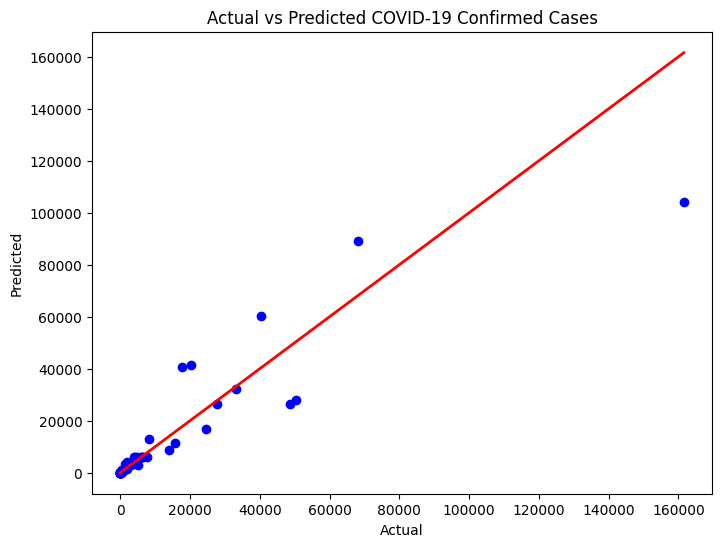

In [38]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted COVID-19 Confirmed Cases')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


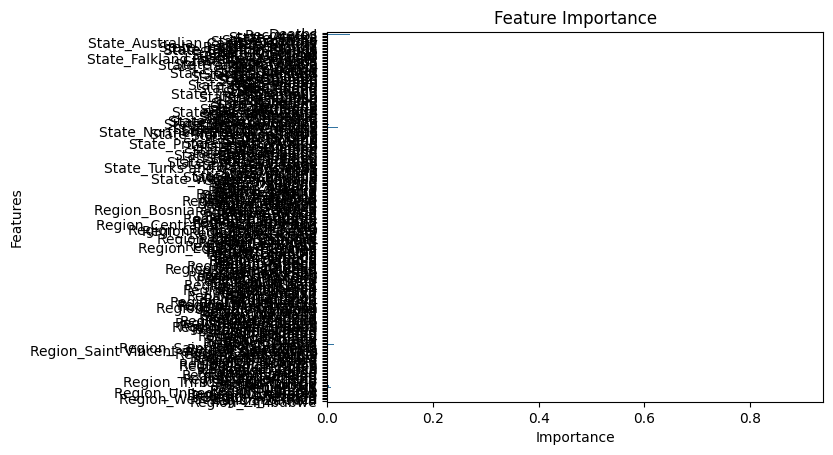

In [39]:
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X_train.columns  # Get feature names

# Create a bar plot for feature importance
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
